In [2]:
# Importing all the required packages and libraries required for running the program and training the KNN model

# re:               This module hepls us to match string patterns and remove unwanted symbols and data using
#                   regular expressions from string or text provided as the input.

# numpy:            This is a Numpy module which helps us to handle huge arrays while working on this kind of 
#                   projects.

# Pandas:           This package is used for handling the data and performing operations such as data loading, 
#                   data analysis, data visualization.

# accuracy_score:   This function helps us to calculate the accuracy of the model basing on the predictions made
#                   and test data.

# nltk:             This package is used when dealing with natural language, this package provides all the 
#                   neccessary functions to handle natural language grammar, semantics. 
#                   Also we used WordNetLemmatizer which lemmatizes the words & eliminates duplicates.        
#                   stopwords is also used to filter out the stopwords such as prepositions in english vocabulary.

# TfidfVectorizer:  This helps assign a term frequency for each word in the text data that we are working with.

# train_test_split: This is used to split the whole data into train and test basing on the split percent we set.

import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to calculate the Euclidean Distance for the given points. This distance is a straight line distance,
# which hepls us to find distance between a given point and it's neighbors in the KNN. 
def eucli_distance(firstx,secondx):
    firstx = np.array(firstx)
    secondx = np.array(secondx)
    distance = 0
    for i in range(len(firstx)):
        distance = distance + (firstx[i]-secondx[i])**2
    return np.sqrt(distance)

# This is a custom KNN class written to make predictions for the input. 
# The __init__ method gets initialized with the given values when the constructor is called later in the program.
# The fit method adujusts weights for better accuracy.
# The makePredictions method takes the xtest data as input and makes label predictions after calculating the 
# Euclidean distances and sorting the list according to first 'k' nearest neighbors.  
class custom_K_Nearest_Neighbors:
    # Defining a __init__ function inside custom_K_Nearest_Neighbors class using def keyword and distance metric is 
    # euclidean distance as we are calculating the same here.
    def __init__(self, k, dist_metric=eucli_distance):
        self.k = k
        self.dist_metric = dist_metric
    
    # Defining a fit function inside custom_K_Nearest_Neighbors class using def keyword.
    def fit(self, xtrain, ytrain):
        self.xtrain = list(xtrain) # converting to a list using list() function.
        self.ytrain = list(ytrain) # converting to a list using list() function.

    # Defining a make_predictions function inside custom_K_Nearest_Neighbors class using def keyword.
    def make_predictions(self, xtest):
        label_predictions = [] # creating a empty list named label_predictions to store predictions made by the model
        xtest=list(xtest) # converting to a list using list() function.
        # We have to loop through all points in xtrain for each point in xtest so starting a for loop to loop through
        # all variables in xtest.
        for i in range(len(xtest)):
            # Creating a variable to count the total number of +ve or -ve labels after sorting all the distances.
            # and picking first k values.
            positive_count = 0
            negative_count = 0
            # creating a empty list named e_distances to store the all the calculated Euclidean distances.
            e_distances = []
            
            # We have to loop through all points in xtrain for each point in xtest, so this is a child loop for
            # looping thorugh all points in xtrain.
            for j in range(len(self.xtrain)):
                # calculating Euclidean distances using function defined above and storing it in variable e_dis
                e_dis = eucli_distance(xtest[i],self.xtrain[j])
                # now adding the e_dis value, and associated ytrain i.e the label value to the e_distances list created
                # above.
                e_distances.append((e_dis, self.ytrain[j]))
            
            # Sorting the distances list here using sorted() function basing on the key value in position [0]. 
            e_distances = sorted(e_distances, key=lambda x:x[0])
            # slicing the e_distances list to first k lowest distances and storing it in sliced_distances. 
            sliced_distances = e_distances[:self.k]

            # this for loop is to iterate through the first lowest k values and fin the most common label, so
            # that we can make a prediction
            for l in range(len(sliced_distances)):
                if sliced_distances[l][1] == 1:
                    positive_count = positive_count+1 
                else:
                    negative_count = negative_count+1 
            # checking for most common label and appending it to the label_predictions list
            if negative_count>positive_count:
                label_predictions.append(-1)
            else:
                label_predictions.append(1)  
        # returning the predicted values 
        return label_predictions


# Text cleaning is required as raw data cannot be directly passed onto the KNN model. Cleaning the text data also
# improves the accuracy. 
def text_cleaning(rawData):
    # using re.sub() to match patterns and filter out anything other than alphabets.
    alphabets_only = re.sub("[^a-zA-Z]", " ", rawData)

    # converting the tes=xt data obtained above to lower case and spliting it by whitespaces.
    words_lower = alphabets_only.lower().split()     
    
    # gathering all the stopwords and storing it in stop_words
    stop_words = set(stopwords.words("english"))                  
    
    # initializing the lemmatizer.
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = '' # creating an empty string
    for word in words_lower: # looping through each word in all the words to lemmatize it
        # checking if the word above is in the stopwords gathered above, as we dont lemmatization for stopwords.
        if word not in stop_words: 
            # we are lemmatizing the words and concating it back to form a sentence.
            lemmatized_sentence += str(lemmatizer.lemmatize(word)) + ' '
    # returning the lemmatized output
    return lemmatized_sentence

# Reading the data using pandas function from csv file, here header is None as there are no column headings.
dataset = pd.read_csv('../Data/train_file.csv', header = None)
test_dataset = pd.read_csv('../Data/test_file.csv', header = None)
X = dataset[1] # col 1 contains all the text data so loading it into the the variable X.
y = dataset[0] # col 0 contains all the label data so loading in into the variable y. 
# col 0 contains all the data so loading in into the variable t. there are no label data here as this
# is purely to make predictions only.
t = test_dataset[0] 

# Cleaing the text data, here we are looping through each line in the text dataset and calling the text_cleaning
# function and adding it to the cleaned_data list using append() function.
cleaned_data = []
t_cleaned = []
for line in X:
     cleaned_data.append(text_cleaning(line))

# Also Cleaning the data for which predictions are to be made. 
for tline in t:
    t_cleaned.append(text_cleaning(tline))

# Splitting the data into test and train, here the split percent is 80, 20
X_train, X_test, y_train, y_test = train_test_split(cleaned_data, y, test_size=0.2, random_state=42)

# Applying Tfidf Vectorizer on the data after split. We only apply thet Tfifd Vectorizer on the X_train
# and X_test and data for which predictions are to be made.
tfidf_transformer = TfidfVectorizer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)
t_tfidf = tfidf_transformer.transform(t_cleaned)

# Applying Truncated SVD which carries out linear dimensionality reduction. 
# and X_test and data for which predictions are to be made.
reduction_svd = TruncatedSVD(5)
X_train_svd = reduction_svd.fit_transform(X_train_tfidf)
X_test_svd = reduction_svd.transform(X_test_tfidf)
t_reduced = reduction_svd.transform(t_tfidf)

# Here I'm considering the k value as 9, so initializing into variable k 
k=9

# Intializing the constructor with value k=k into variable knn, here k value is 9 and this 
# calls __init__ method written above. 
knn = custom_K_Nearest_Neighbors(k=k)

# using the knn variable we call fit method which adujusts weights for better accuracy,
# we are sending in the train data here as the model trains on them. 
knn.fit(X_train_svd, y_train)

# We are making a variable predictions and store all the predictions made into this variable. 
# Also we are calling the make_predictions function using the knn object created above and passing in the test data. 
predictions = knn.make_predictions(X_test_svd)

# opening a text file in write mode so that predictions made can be sent to the text file.
# fi = open("TestDataPredictionsHW1", "w")

# # looping through each value of the prediction so that they can be printed line by line.
# for prediction in predictions:
#     # converting the value to string and then printing it to the file.
#     print(str(prediction), file=fi)
# # Closing the file object once the data is printed to the text file.
# fi.close()

In [3]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.77      0.75      0.76      1815
           1       0.75      0.77      0.76      1785

    accuracy                           0.76      3600
   macro avg       0.76      0.76      0.76      3600
weighted avg       0.76      0.76      0.76      3600



[1365  450  404 1381]


[Text(0.5, 23.52222222222222, 'Actual'),
 Text(50.722222222222214, 0.5, 'Predictions')]

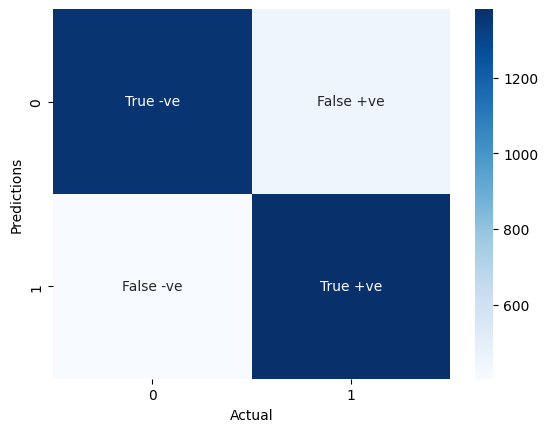

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

con_matrix=confusion_matrix(y_test,predictions)
print(con_matrix.ravel())

vars = ['True -ve','False +ve','False -ve','True +ve']
vars = np.asarray(vars).reshape(2,2)
hp = sns.heatmap(con_matrix, annot=vars, fmt='', cmap='Blues')
hp.set(xlabel='Actual', ylabel='Predictions')